# THE PROBLEM STATEMENT 

The objective of this case study is to predict the employee salary based on the number of years of experience.

# IMPORT LIBRARIES AND DATASETS

In [2]:
# install seaborn library
# !pip install seaborn
# !pip install tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# read the csv file 
salary_df = pd.read_csv('salary.csv')

In [4]:
salary_df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
salary_df.head(7)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150


In [6]:
salary_df.tail(7)

,YearsExperience,Salary
28,10.3,122391
29,10.5,121872
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [7]:
salary_df['Salary'].max()

139465

# EXPLORATORY DATA ANALYSIS AND VISUALIZATION

<Axes: >

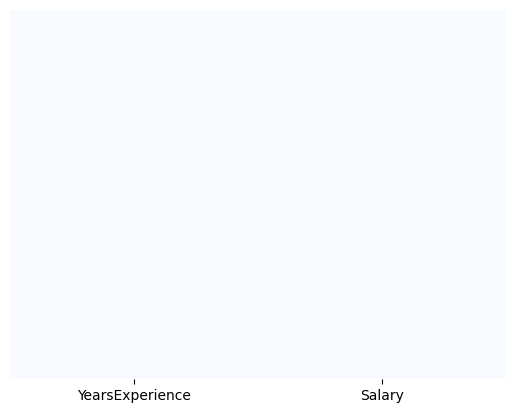

In [8]:
# check if there are any Null values
sns.heatmap(salary_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [9]:
# Check the dataframe info

salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [10]:
# Statistical summary of the dataframe

salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

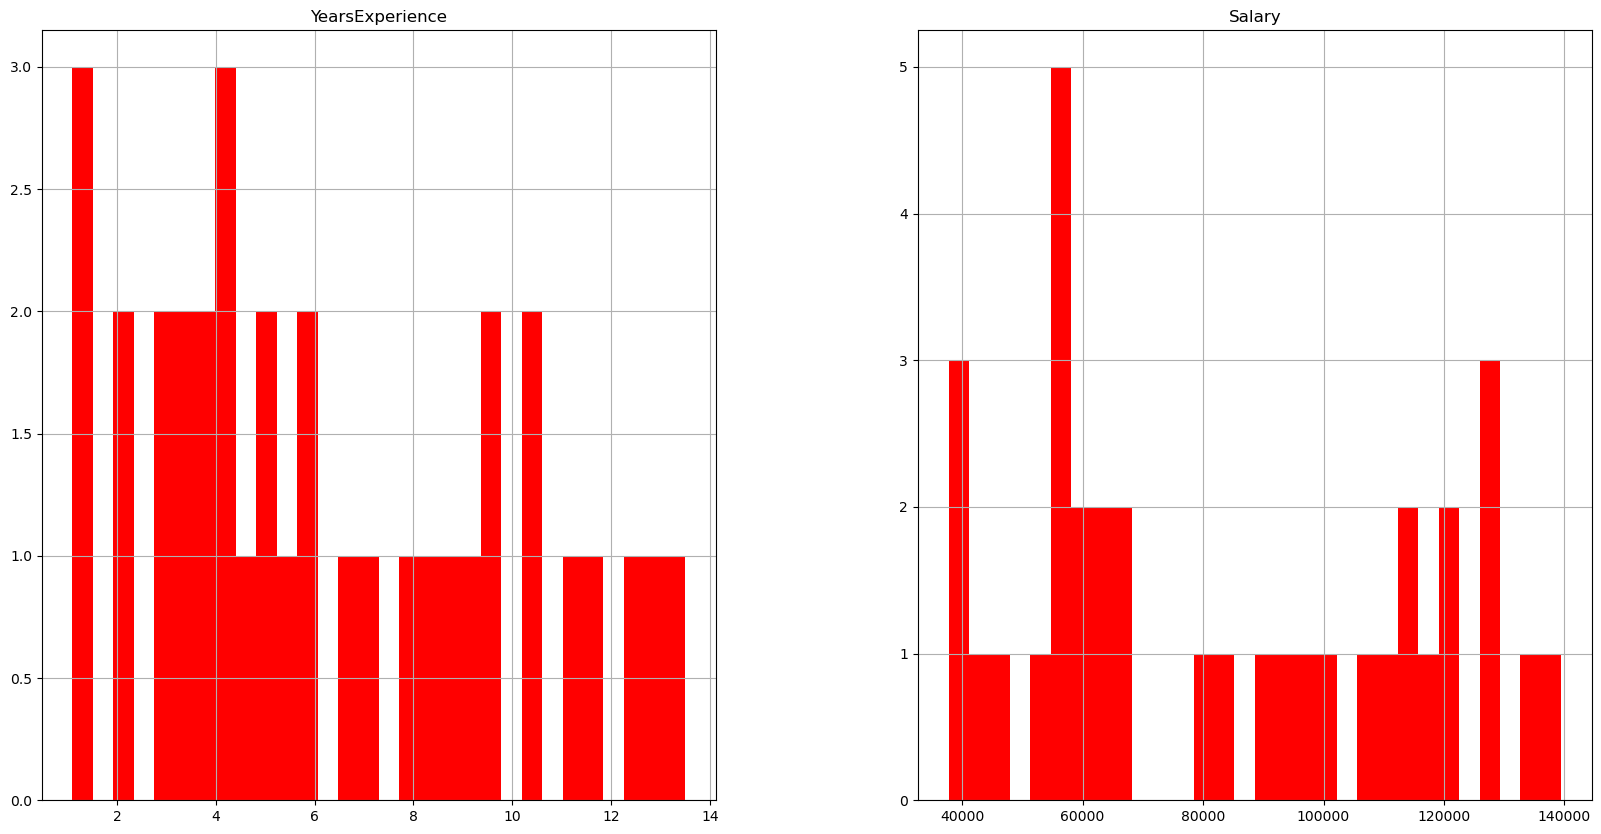

In [11]:
salary_df.hist(bins = 30, figsize = (20,10), color = 'r')


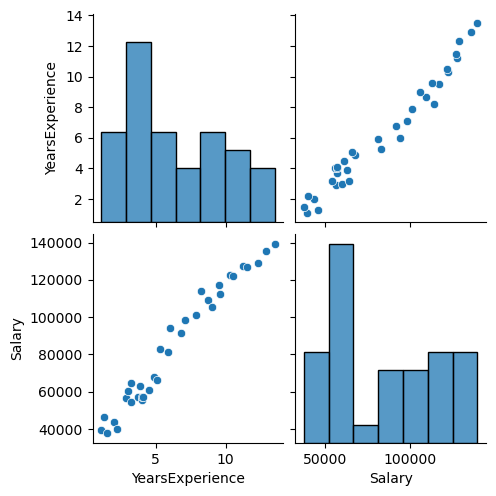

In [12]:
# plot pairplot

sns.pairplot(salary_df)

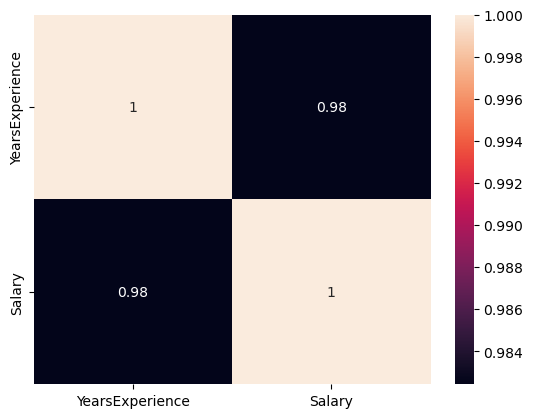

In [13]:
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

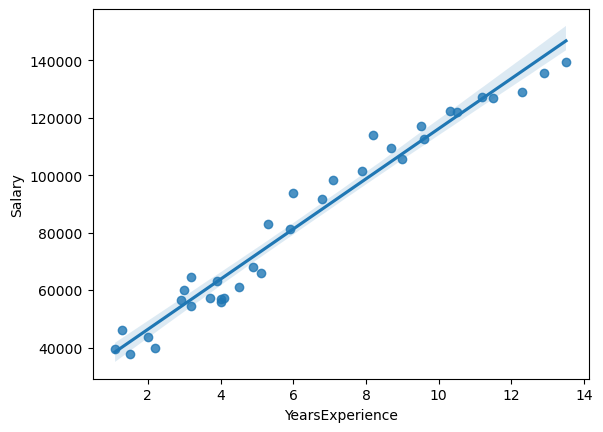

In [14]:
sns.regplot(data=salary_df, x="YearsExperience", y="Salary")

# CREATE TRAINING AND TESTING DATASET

In [15]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]


In [16]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [17]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [18]:
X.shape

(35, 1)

In [19]:
y.shape

(35, 1)

In [20]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [21]:
# Only take the numerical variables and scale them
X 

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]], dtype=float32)

In [22]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# TRAIN A LINEAR REGRESSION MODEL IN SK-LEARN (WITHOUT SAGEMAKER BUILT-IN ALGORITHMS)

In [23]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [24]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.9728741884187064

In [25]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[8812.051]]
Linear Model Coefficient (b):  [29064.902]


# EVALUATE TRAINED MODEL PERFORMANCE (WITHOUT  SAGEMAKER BUILT-IN ALGORITHMS)

In [26]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [27]:
y_predict

array([[130403.484],
       [ 72243.95 ],
       [137453.12 ],
       [ 88986.84 ],
       [ 46689.004],
       [ 68719.125],
       [ 63431.902]], dtype=float32)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

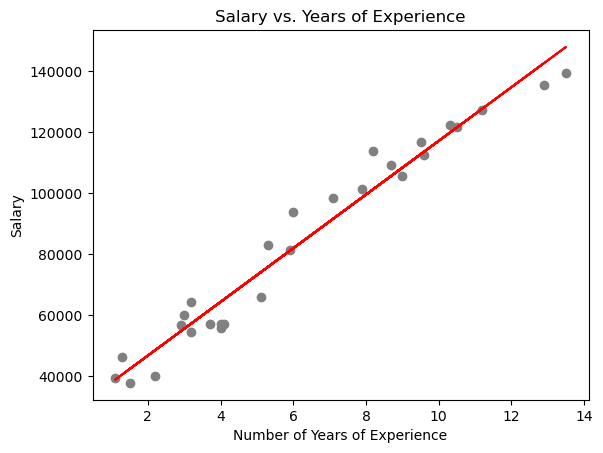

In [28]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience')

Obtain the salary corresponding to eployees who have years of experience = 5

In [29]:
y_predict_5_years = regresssion_model_sklearn.predict([[5]])
y_predict_5_years

array([[73125.15625]])

# TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

In [30]:
import sagemaker
import boto3
from sagemaker import Session

# Create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket()
# Define the S3 bucket and prefix to be used in this session
bucket = 'sagemaker-projects-2024'
prefix = 'linear_learner'

# Get the execution role for the notebook instance. It will be passed to the training job.
# This is the IAM role that was created while creating notebook instance.
role = sagemaker.get_execution_role()
print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
arn:aws:iam::666663911149:role/service-role/AmazonSageMaker-ExecutionRole-20240307T162869


In [31]:
X_train.shape

(28, 1)

In [32]:
y_train = y_train[:,0]

In [33]:
y_train.shape

(28,)

In [34]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Convert the data in numpy array format to RecordIO format (format required by Sagemaker Linear Learner)

buf = io.BytesIO() # create an in-memory byte array
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
# When writing to in-memory byte arrays, it increments 1 every time the write is performed to it
# Reset that back to zero 
buf.seek(0) 

0

In [35]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file
key = 'linear-train-data'

# Upload the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-projects-2024/linear_learner/train/linear-train-data


In [36]:
X_test.shape

(7, 1)

In [37]:
y_test.shape

(7, 1)

In [38]:
# Make sure that the target label is a vector
y_test = y_test[:,0]

In [39]:
y_test.shape

(7,)

In [40]:
# Code to upload RecordIO data to S3

buf = io.BytesIO() # create an in-memory byte array
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)

# When writing to in-memory byte arrays, it increments 1 every time the write is performed to it
# Reset that back to zero
buf.seek(0)

0

In [41]:
# Key refers to the name of the file
key = 'linear-test-data'

# Upload the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://sagemaker-projects-2024/linear_learner/test/linear-test-data


In [42]:
# Create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-projects-2024/linear_learner/output


In [ ]:
# This code is used to get the training container of sagemaker built-in algorithms
# the name of the algorithm should be specified

# Obtain a reference to the linearLearner container image
# All regression models are named estimators

from sagemaker.image_uris import retrieve

container = retrieve("linear-learner", boto3.Session().region_name)

In [46]:
linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session,
                                       use_spot_instances = True,
                                       max_run = 300,
                                       max_wait = 600)


# Tune parameters like the number of features that are passed in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 50,
                           num_models = 32,
                           loss = 'absolute_loss')

# Pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# The progress can be monitored in cloudwatch logs

INFO:sagemaker:Creating training-job with name: linear-learner-2024-03-08-07-29-12-307


2024-03-08 07:29:12 Starting - Starting the training job...
2024-03-08 07:29:26 Starting - Preparing the instances for training......
2024-03-08 07:30:42 Downloading - Downloading the training image.........
2024-03-08 07:32:13 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/08/2024 07:32:19 INFO 140046607693632] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1.0', 'quantile': '0.5', 'loss_inse

# TASK #8: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL 

In [47]:
# Deploying the model to perform inference

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2024-03-08-07-40-39-162
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-03-08-07-40-39-162
INFO:sagemaker:Creating endpoint with name linear-learner-2024-03-08-07-40-39-162


-------!

In [55]:
# for serializing data for an inference endpoint
from sagemaker.serializers import CSVSerializer

# for deserializing data returned from an inference endpoint
from sagemaker.deserializers import JSONDeserializer

from sagemaker.predictor import Predictor

predictor = Predictor(endpoint_name='linear-learner-2024-03-08-07-40-39-162',

                      sagemaker_session=Session(),

                      serializer=CSVSerializer(), # Serialize data to a CSV-formatted string

                      deserializer=JSONDeserializer())# Deserialize JSON data from an inference endpoint into a Python object.

In [56]:
# making prediction on the test data

result = predictor.predict(X_test)

In [57]:
result # results are in Json format

{'predictions': [{'score': 128944.28125},
  {'score': 73498.25},
  {'score': 135665.0},
  {'score': 89459.984375},
  {'score': 49135.59375},
  {'score': 70137.875},
  {'score': 65097.33203125}]}

In [58]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [59]:
predictions

array([128944.28125   ,  73498.25      , 135665.        ,  89459.984375  ,
        49135.59375   ,  70137.875     ,  65097.33203125])

In [60]:
predictions.shape

(7,)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

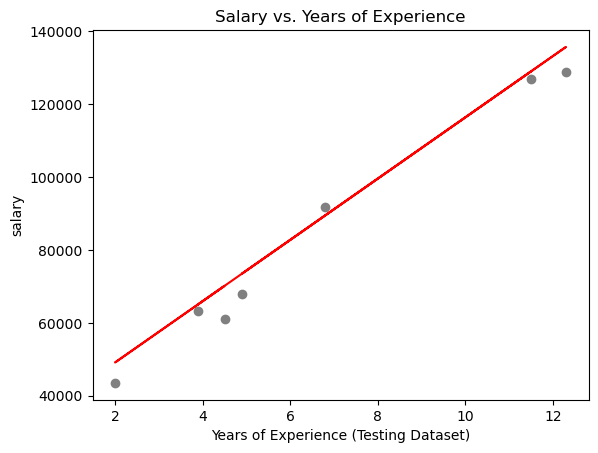

In [61]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Years of Experience (Testing Dataset)')
plt.ylabel('salary')
plt.title('Salary vs. Years of Experience')

In [62]:
# Delete the end-point

linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-03-08-07-40-39-162
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-03-08-07-40-39-162
